# Exploratory Data Analysis on reviews.csv

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("reviews.csv", low_memory=False)
df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


### 1. Data Types and Unique Values

In [4]:
df.dtypes.to_frame("DataType").join(df.nunique().to_frame("UniqueValues"))

,DataType,UniqueValues
id,object,42
name,object,48
asins,object,41
brand,object,6
categories,object,41
keys,object,42
manufacturer,object,2
reviews.date,object,1078
reviews.dateAdded,object,1941
reviews.dateSeen,object,3911


### 2. Summary Statistics

In [6]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,34660,42,AVphgVaX1cnluZ0-DR74,10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,27900,48,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,34658,41,B018Y229OU,10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,34660,6,Amazon,28701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,34660,41,"Fire Tablets,Tablets,Computers & Tablets,All T...",10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keys,34660,42,firetablet7displaywifi8gbincludesspecialoffers...,10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,34660,2,Amazon,34639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.date,34621,1078,2017-01-16T00:00:00.000Z,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.dateAdded,24039,1941,2017-09-05T22:09:30Z,3127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.dateSeen,34660,3911,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",5072,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Missing Values

In [8]:
df.isnull().sum().sort_values(ascending=False)

reviews.userProvince    34660
reviews.userCity        34660
reviews.didPurchase     34659
reviews.id              34659
reviews.dateAdded       10621
name                     6760
reviews.doRecommend       594
reviews.numHelpful        529
reviews.date               39
reviews.rating             33
reviews.username            7
reviews.title               6
asins                       2
reviews.text                1
reviews.dateSeen            0
manufacturer                0
keys                        0
categories                  0
reviews.sourceURLs          0
brand                       0
id                          0
dtype: int64

### 4. Visualizations (Histogram, Boxplot)

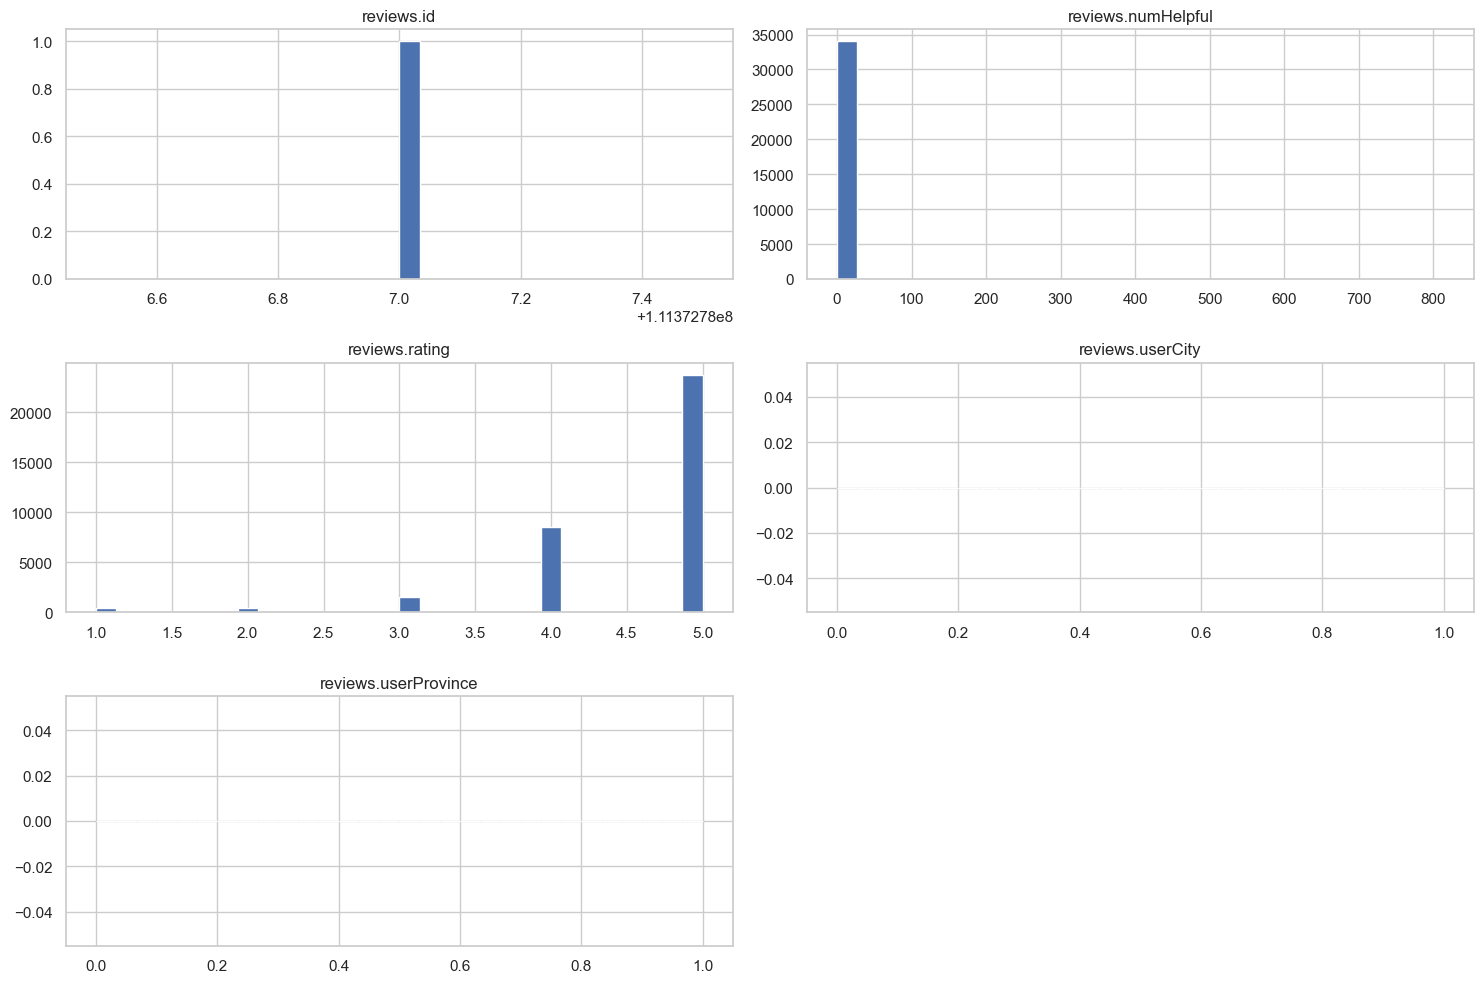

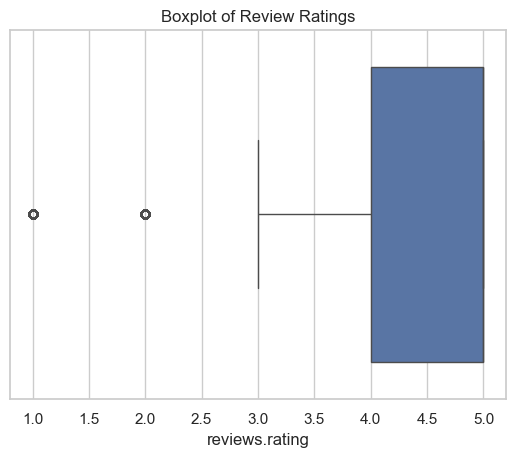

In [10]:

df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

sns.boxplot(x=df["reviews.rating"])
plt.title("Boxplot of Review Ratings")
plt.show()


### 5. Correlation Heatmap

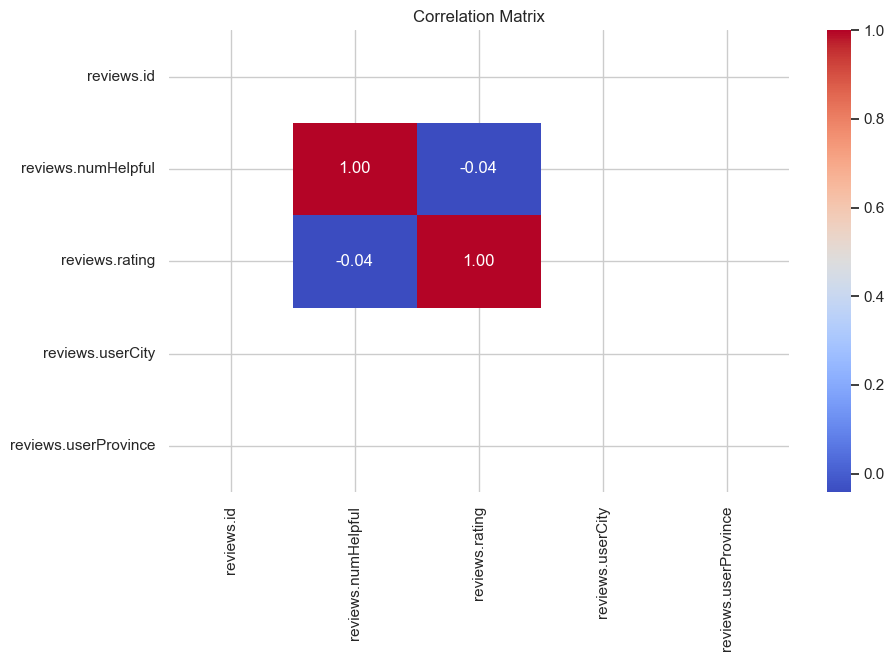

In [12]:

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### 6. Outlier Detection

In [14]:

for col in ['reviews.rating', 'reviews.numHelpful']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    print(f"{col} has {outliers.sum()} outliers")


reviews.rating has 812 outliers
reviews.numHelpful has 3311 outliers


### 7. Distribution of Review Ratings

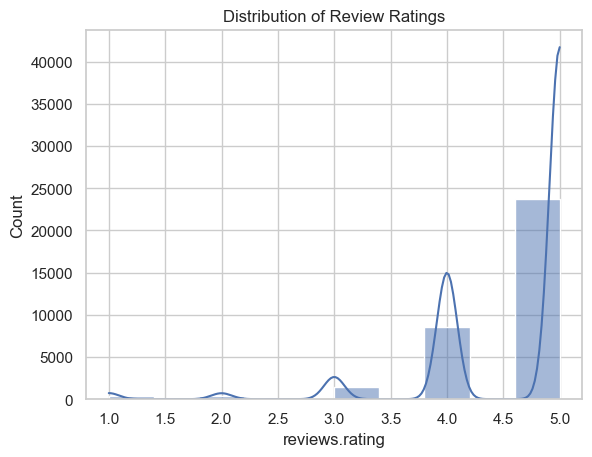

In [16]:

sns.histplot(df['reviews.rating'], kde=True, bins=10)
plt.title("Distribution of Review Ratings")
plt.show()


### 8. Review Trends Over Time

C:\Users\DELL\AppData\Local\Temp\ipykernel_8988\3144852614.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['reviews.date'].dt.to_period('M').astype(str)


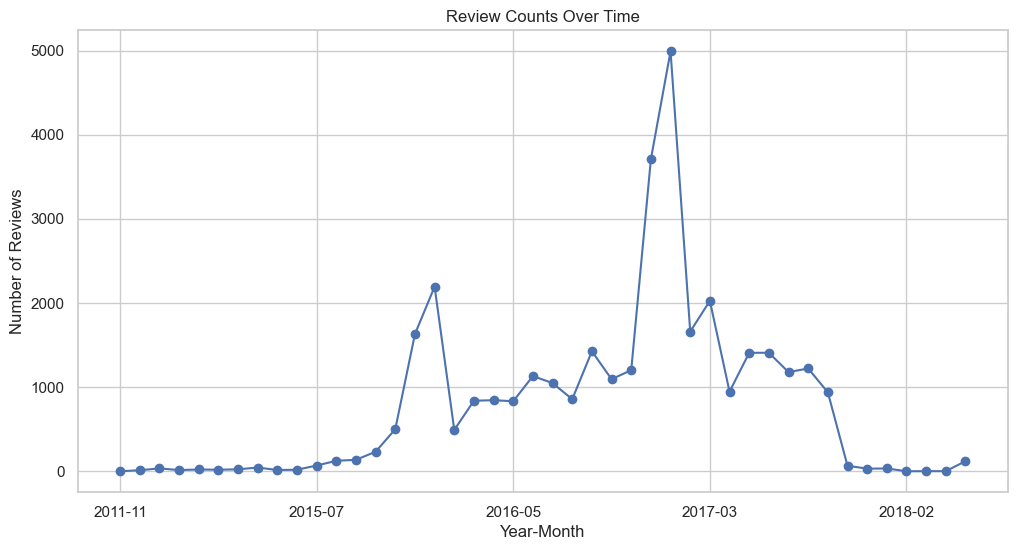

In [18]:

df['reviews.date'] = pd.to_datetime(df['reviews.date'], errors='coerce')
df['year_month'] = df['reviews.date'].dt.to_period('M').astype(str)
monthly_reviews = df.groupby('year_month').size()
monthly_reviews.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Review Counts Over Time")
plt.ylabel("Number of Reviews")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()


### 9. Average Rating by Brand

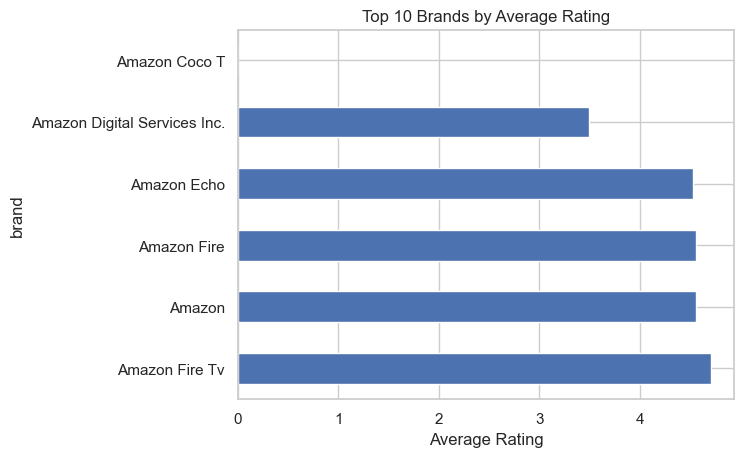

In [20]:

avg_rating_by_brand = df.groupby('brand')['reviews.rating'].mean().sort_values(ascending=False)
avg_rating_by_brand.head(10).plot(kind='barh')
plt.title("Top 10 Brands by Average Rating")
plt.xlabel("Average Rating")
plt.show()


### 10. Pairwise Plot

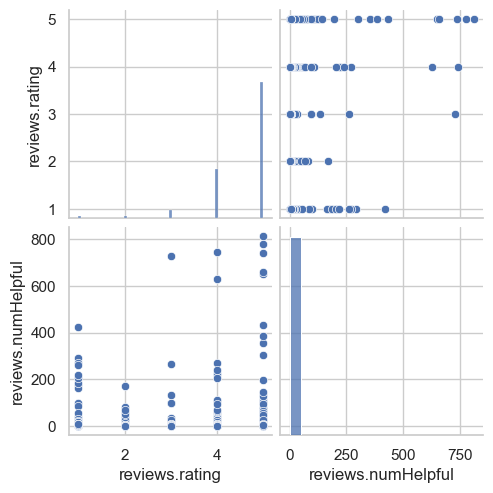

In [22]:

sns.pairplot(df[['reviews.rating', 'reviews.numHelpful']].dropna())
plt.show()


##  Data Preprocessing

In [24]:

# Drop columns with too many missing values or irrelevant ones
df_model = df.copy()
df_model = df_model.drop(columns=['reviews.userCity', 'reviews.userProvince', 'reviews.id', 'reviews.date', 'year_month'], errors='ignore')

# Drop rows with missing target (rating)
df_model = df_model[df_model['reviews.rating'].notnull()]

# Encode categorical features
label_encoders = {}
for col in df_model.select_dtypes(include=['object', 'bool']).columns:
    df_model[col] = df_model[col].astype(str).fillna("Unknown")
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


# Fill remaining missing values with median
df_model.fillna(df_model.median(numeric_only=True), inplace=True)

# Split features and target
X = df_model.drop(columns='reviews.rating')
y = df_model['reviews.rating']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##  Machine Learning Model

In [26]:

# Classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6962171527577246

Classification Report:
              precision    recall  f1-score   support

         1.0       0.36      0.30      0.33        86
         2.0       0.29      0.19      0.23        84
         3.0       0.43      0.24      0.30       302
         4.0       0.45      0.17      0.25      1731
         5.0       0.74      0.93      0.82      4723

    accuracy                           0.70      6926
   macro avg       0.45      0.37      0.39      6926
weighted avg       0.64      0.70      0.64      6926

